<a href="https://colab.research.google.com/github/nenavathkrishna/TSF-Data-Science-And-Business-Analytics-Tasks/blob/main/flight_task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('flights.csv',  low_memory=False)
data

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5.0,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448.0,404.0,4.0,430.0,408.0,-22.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10.0,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330.0,737.0,4.0,750.0,741.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20.0,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296.0,800.0,11.0,806.0,811.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20.0,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342.0,748.0,8.0,805.0,756.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25.0,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448.0,254.0,5.0,320.0,259.0,-21.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1165708,2015,3,17,2,MQ,3219,N853MQ,DFW,AMA,1250.0,1244.0,-6.0,12.0,1256.0,72.0,65.0,49.0,312.0,1345.0,4.0,1402.0,1349.0,-13.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1165709,2015,3,17,2,OO,5385,N569SW,CEC,SFO,1250.0,1322.0,32.0,13.0,1335.0,95.0,85.0,70.0,304.0,1445.0,2.0,1425.0,1447.0,22.0,0.0,0.0,NaN,0.0,0.0,0.0,22.0,0.0
1165710,2015,3,17,2,OO,5459,N582SW,SFO,SBP,1250.0,1241.0,-9.0,14.0,1255.0,67.0,64.0,46.0,190.0,1341.0,4.0,1357.0,1345.0,-12.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1165711,2015,3,17,2,OO,6345,N593ML,LNK,DEN,1250.0,1250.0,0.0,10.0,1300.0,93.0,92.0,72.0,423.0,1312.0,10.0,1323.0,1322.0,-1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = data[0:100000]
df

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5.0,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448.0,404.0,4.0,430.0,408.0,-22.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10.0,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330.0,737.0,4.0,750.0,741.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20.0,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296.0,800.0,11.0,806.0,811.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20.0,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342.0,748.0,8.0,805.0,756.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25.0,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448.0,254.0,5.0,320.0,259.0,-21.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2015,1,7,3,EV,4992,N837AS,ATL,BQK,1108.0,1102.0,-6.0,23.0,1125.0,71.0,66.0,40.0,238.0,1205.0,3.0,1219.0,1208.0,-11.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
99996,2015,1,7,3,NK,394,N522NK,LAS,PHL,1108.0,1117.0,9.0,11.0,1128.0,274.0,267.0,248.0,2176.0,1836.0,8.0,1842.0,1844.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
99997,2015,1,7,3,OO,5606,N582SW,SFO,BFL,1108.0,1101.0,-7.0,28.0,1129.0,77.0,91.0,59.0,238.0,1228.0,4.0,1225.0,1232.0,7.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
99998,2015,1,7,3,UA,1135,N38473,ORD,MCO,1109.0,1116.0,7.0,26.0,1142.0,165.0,157.0,123.0,1005.0,1445.0,8.0,1454.0,1453.0,-1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 100000 non-null  int64  
 1   MONTH                100000 non-null  int64  
 2   DAY                  100000 non-null  int64  
 3   DAY_OF_WEEK          100000 non-null  int64  
 4   AIRLINE              100000 non-null  object 
 5   FLIGHT_NUMBER        100000 non-null  int64  
 6   TAIL_NUMBER          99833 non-null   object 
 7   ORIGIN_AIRPORT       100000 non-null  object 
 8   DESTINATION_AIRPORT  100000 non-null  object 
 9   SCHEDULED_DEPARTURE  100000 non-null  float64
 10  DEPARTURE_TIME       97702 non-null   float64
 11  DEPARTURE_DELAY      97702 non-null   float64
 12  TAXI_OUT             97629 non-null   float64
 13  WHEELS_OFF           97629 non-null   float64
 14  SCHEDULED_TIME       100000 non-null  float64
 15  ELAPSED_TIME      

In [ ]:
df.value_counts('DIVERTED')

DIVERTED
0.0    99776
1.0      224
dtype: int64

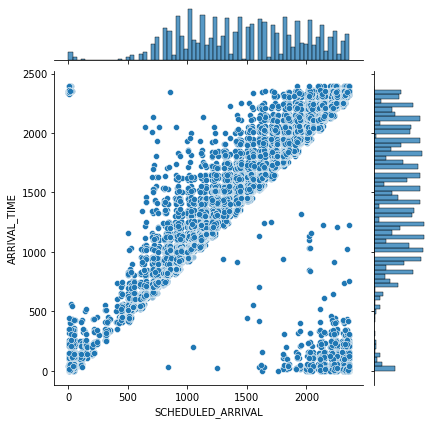

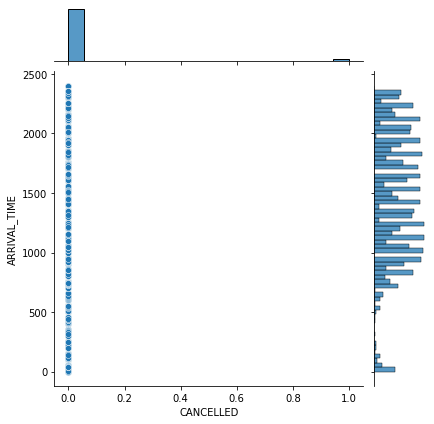

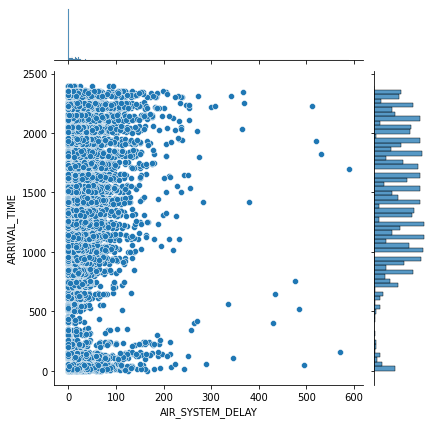

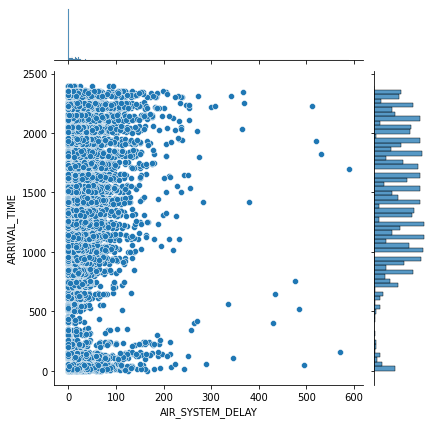

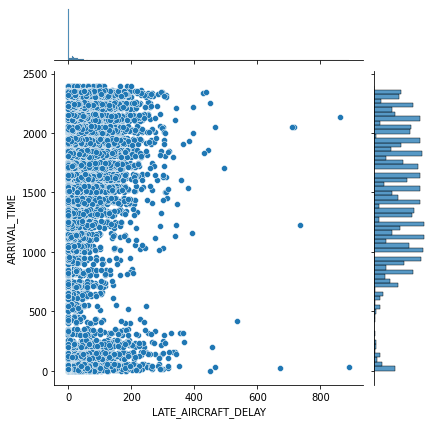

In [ ]:
sns.jointplot(data=df, x="SCHEDULED_ARRIVAL", y="ARRIVAL_TIME")
sns.jointplot(data=df, x="CANCELLED", y="ARRIVAL_TIME")
sns.jointplot(data=df, x="AIR_SYSTEM_DELAY", y="ARRIVAL_TIME")
sns.jointplot(data=df, x="AIR_SYSTEM_DELAY", y="ARRIVAL_TIME")
sns.jointplot(data=df, x="LATE_AIRCRAFT_DELAY", y="ARRIVAL_TIME")

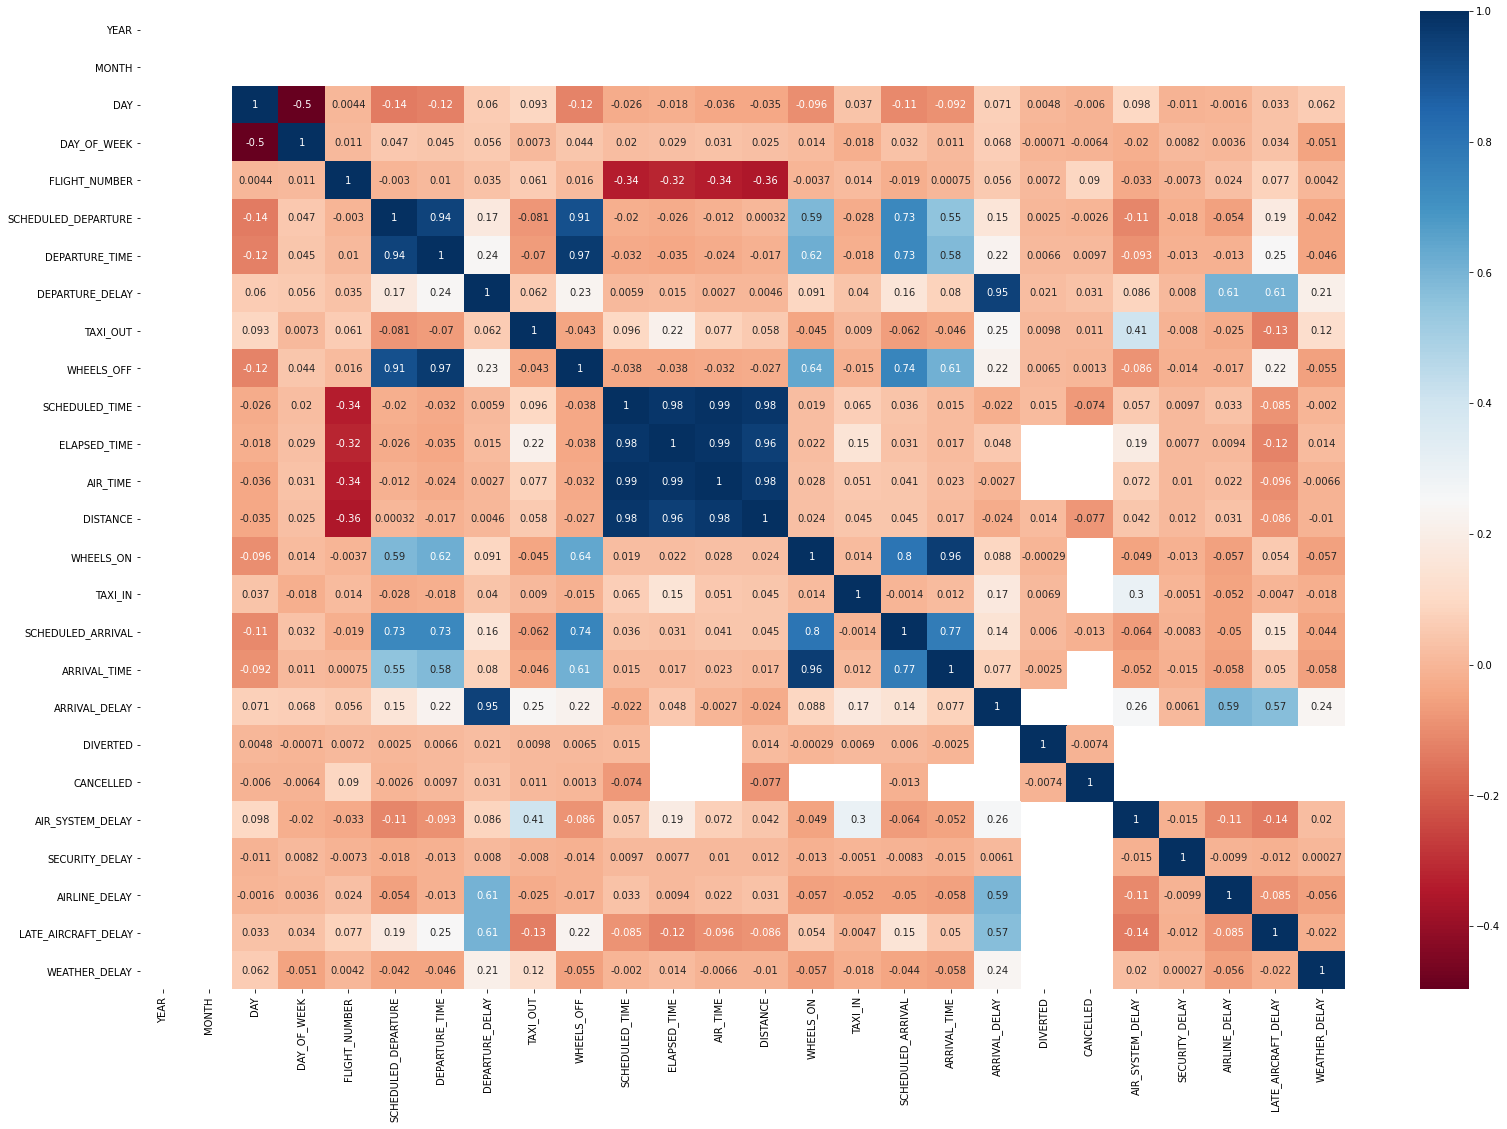

In [ ]:
df.corr()
#Correlation with output variable
plt.figure(figsize=(27,18))
cor = df.corr()# here corr is an correlation between each feature of data
sns.heatmap(cor, annot=True, cmap=plt.cm.RdBu)
plt.show()

In [ ]:
df[df.columns[1:]].corr()['ARRIVAL_DELAY'][:].sort_values(ascending=False)

ARRIVAL_DELAY          1.000000
DEPARTURE_DELAY        0.950838
AIRLINE_DELAY          0.592718
LATE_AIRCRAFT_DELAY    0.572956
AIR_SYSTEM_DELAY       0.259700
TAXI_OUT               0.245363
WEATHER_DELAY          0.235906
DEPARTURE_TIME         0.223654
WHEELS_OFF             0.217344
TAXI_IN                0.170073
SCHEDULED_DEPARTURE    0.154951
SCHEDULED_ARRIVAL      0.140565
WHEELS_ON              0.088131
ARRIVAL_TIME           0.076791
DAY                    0.070770
DAY_OF_WEEK            0.067520
FLIGHT_NUMBER          0.056163
ELAPSED_TIME           0.048448
SECURITY_DELAY         0.006070
AIR_TIME              -0.002742
SCHEDULED_TIME        -0.022043
DISTANCE              -0.023821
MONTH                       NaN
DIVERTED                    NaN
CANCELLED                   NaN
Name: ARRIVAL_DELAY, dtype: float64

In [ ]:
df.isnull().sum()

YEAR                       0
MONTH                      0
DAY                        0
DAY_OF_WEEK                0
AIRLINE                    0
FLIGHT_NUMBER              0
TAIL_NUMBER              167
ORIGIN_AIRPORT             0
DESTINATION_AIRPORT        0
SCHEDULED_DEPARTURE        0
DEPARTURE_TIME          2298
DEPARTURE_DELAY         2298
TAXI_OUT                2371
WHEELS_OFF              2371
SCHEDULED_TIME             0
ELAPSED_TIME            2613
AIR_TIME                2613
DISTANCE                   0
WHEELS_ON               2440
TAXI_IN                 2440
SCHEDULED_ARRIVAL          0
ARRIVAL_TIME            2440
ARRIVAL_DELAY           2613
DIVERTED                   0
CANCELLED                  0
CANCELLATION_REASON    97611
AIR_SYSTEM_DELAY       65375
SECURITY_DELAY         65375
AIRLINE_DELAY          65375
LATE_AIRCRAFT_DELAY    65375
WEATHER_DELAY          65375
dtype: int64

In [ ]:
#Correlation with output variable
cor_target = abs(cor["ARRIVAL_DELAY"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.06]
relevant_features

DAY                    0.070770
DAY_OF_WEEK            0.067520
SCHEDULED_DEPARTURE    0.154951
DEPARTURE_TIME         0.223654
DEPARTURE_DELAY        0.950838
TAXI_OUT               0.245363
WHEELS_OFF             0.217344
WHEELS_ON              0.088131
TAXI_IN                0.170073
SCHEDULED_ARRIVAL      0.140565
ARRIVAL_TIME           0.076791
ARRIVAL_DELAY          1.000000
AIR_SYSTEM_DELAY       0.259700
AIRLINE_DELAY          0.592718
LATE_AIRCRAFT_DELAY    0.572956
WEATHER_DELAY          0.235906
Name: ARRIVAL_DELAY, dtype: float64

### droping some unwantted featurs

In [ ]:
df=df.drop(['YEAR','FLIGHT_NUMBER','AIRLINE','DISTANCE','TAIL_NUMBER','TAXI_OUT', 
            'SCHEDULED_TIME','DEPARTURE_TIME','WHEELS_OFF','ELAPSED_TIME', 'AIR_TIME',
            'WHEELS_ON','DAY_OF_WEEK','TAXI_IN','CANCELLATION_REASON'], axis=1)

In [ ]:
df

,MONTH,DAY,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,1,1,ANC,SEA,5.0,-11.0,430.0,408.0,-22.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,1,1,LAX,PBI,10.0,-8.0,750.0,741.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,1,1,SFO,CLT,20.0,-2.0,806.0,811.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,1,1,LAX,MIA,20.0,-5.0,805.0,756.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,1,1,SEA,ANC,25.0,-1.0,320.0,259.0,-21.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,7,ATL,BQK,1108.0,-6.0,1219.0,1208.0,-11.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
99996,1,7,LAS,PHL,1108.0,9.0,1842.0,1844.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
99997,1,7,SFO,BFL,1108.0,-7.0,1225.0,1232.0,7.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
99998,1,7,ORD,MCO,1109.0,7.0,1454.0,1453.0,-1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.isnull().sum()

MONTH                      0
DAY                        0
ORIGIN_AIRPORT             0
DESTINATION_AIRPORT        0
SCHEDULED_DEPARTURE        0
DEPARTURE_DELAY         2298
SCHEDULED_ARRIVAL          0
ARRIVAL_TIME            2440
ARRIVAL_DELAY           2613
DIVERTED                   0
CANCELLED                  0
AIR_SYSTEM_DELAY       65375
SECURITY_DELAY         65375
AIRLINE_DELAY          65375
LATE_AIRCRAFT_DELAY    65375
WEATHER_DELAY          65375
dtype: int64

In [ ]:
df=df.fillna(df.mean())
df

,MONTH,DAY,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,1,1,ANC,SEA,5.0,-11.0,430.0,408.0,-22.0,0.0,0.0,14.026801,0.070787,17.853921,26.014556,2.751971
1,1,1,LAX,PBI,10.0,-8.0,750.0,741.0,-9.0,0.0,0.0,14.026801,0.070787,17.853921,26.014556,2.751971
2,1,1,SFO,CLT,20.0,-2.0,806.0,811.0,5.0,0.0,0.0,14.026801,0.070787,17.853921,26.014556,2.751971
3,1,1,LAX,MIA,20.0,-5.0,805.0,756.0,-9.0,0.0,0.0,14.026801,0.070787,17.853921,26.014556,2.751971
4,1,1,SEA,ANC,25.0,-1.0,320.0,259.0,-21.0,0.0,0.0,14.026801,0.070787,17.853921,26.014556,2.751971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,7,ATL,BQK,1108.0,-6.0,1219.0,1208.0,-11.0,0.0,0.0,14.026801,0.070787,17.853921,26.014556,2.751971
99996,1,7,LAS,PHL,1108.0,9.0,1842.0,1844.0,2.0,0.0,0.0,14.026801,0.070787,17.853921,26.014556,2.751971
99997,1,7,SFO,BFL,1108.0,-7.0,1225.0,1232.0,7.0,0.0,0.0,14.026801,0.070787,17.853921,26.014556,2.751971
99998,1,7,ORD,MCO,1109.0,7.0,1454.0,1453.0,-1.0,0.0,0.0,14.026801,0.070787,17.853921,26.014556,2.751971


In [ ]:
df.isnull().sum()

MONTH                  0
DAY                    0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_DELAY        0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
AIR_SYSTEM_DELAY       0
SECURITY_DELAY         0
AIRLINE_DELAY          0
LATE_AIRCRAFT_DELAY    0
WEATHER_DELAY          0
dtype: int64

In [ ]:
result=[]
for row in df['ARRIVAL_DELAY']:
    if row > 15:
        result.append(1)
    else:
        result.append(0) 

In [ ]:
df['results']=result

In [ ]:
df

,MONTH,DAY,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,results
0,1,1,ANC,SEA,5.0,-11.0,430.0,408.0,-22.0,0.0,0.0,14.026801,0.070787,17.853921,26.014556,2.751971,0
1,1,1,LAX,PBI,10.0,-8.0,750.0,741.0,-9.0,0.0,0.0,14.026801,0.070787,17.853921,26.014556,2.751971,0
2,1,1,SFO,CLT,20.0,-2.0,806.0,811.0,5.0,0.0,0.0,14.026801,0.070787,17.853921,26.014556,2.751971,0
3,1,1,LAX,MIA,20.0,-5.0,805.0,756.0,-9.0,0.0,0.0,14.026801,0.070787,17.853921,26.014556,2.751971,0
4,1,1,SEA,ANC,25.0,-1.0,320.0,259.0,-21.0,0.0,0.0,14.026801,0.070787,17.853921,26.014556,2.751971,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,7,ATL,BQK,1108.0,-6.0,1219.0,1208.0,-11.0,0.0,0.0,14.026801,0.070787,17.853921,26.014556,2.751971,0
99996,1,7,LAS,PHL,1108.0,9.0,1842.0,1844.0,2.0,0.0,0.0,14.026801,0.070787,17.853921,26.014556,2.751971,0
99997,1,7,SFO,BFL,1108.0,-7.0,1225.0,1232.0,7.0,0.0,0.0,14.026801,0.070787,17.853921,26.014556,2.751971,0
99998,1,7,ORD,MCO,1109.0,7.0,1454.0,1453.0,-1.0,0.0,0.0,14.026801,0.070787,17.853921,26.014556,2.751971,0


In [ ]:
df['results'].value_counts()

0    63779
1    36221
Name: results, dtype: int64

In [ ]:
df.isnull().sum()

MONTH                  0
DAY                    0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_DELAY        0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
AIR_SYSTEM_DELAY       0
SECURITY_DELAY         0
AIRLINE_DELAY          0
LATE_AIRCRAFT_DELAY    0
WEATHER_DELAY          0
results                0
dtype: int64

In [ ]:
df=df.drop(['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'ARRIVAL_TIME', 'ARRIVAL_DELAY'], axis=1)
df

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,results
0,1,1,5.0,-11.0,430.0,0.0,0.0,14.026801,0.070787,17.853921,26.014556,2.751971,0
1,1,1,10.0,-8.0,750.0,0.0,0.0,14.026801,0.070787,17.853921,26.014556,2.751971,0
2,1,1,20.0,-2.0,806.0,0.0,0.0,14.026801,0.070787,17.853921,26.014556,2.751971,0
3,1,1,20.0,-5.0,805.0,0.0,0.0,14.026801,0.070787,17.853921,26.014556,2.751971,0
4,1,1,25.0,-1.0,320.0,0.0,0.0,14.026801,0.070787,17.853921,26.014556,2.751971,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,7,1108.0,-6.0,1219.0,0.0,0.0,14.026801,0.070787,17.853921,26.014556,2.751971,0
99996,1,7,1108.0,9.0,1842.0,0.0,0.0,14.026801,0.070787,17.853921,26.014556,2.751971,0
99997,1,7,1108.0,-7.0,1225.0,0.0,0.0,14.026801,0.070787,17.853921,26.014556,2.751971,0
99998,1,7,1109.0,7.0,1454.0,0.0,0.0,14.026801,0.070787,17.853921,26.014556,2.751971,0


In [ ]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(df,test_size=0.30,random_state=42)
X=df.drop(['results'],axis=1)
y=df.results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
# Normalizing continuous variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# import decision tree model from sklearn
from sklearn.tree import DecisionTreeClassifier
dtr=DecisionTreeClassifier()

In [ ]:
dtr.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
Predictions = dtr.predict(X_test)

In [ ]:
from sklearn.metrics import roc_auc_score
roc_score = roc_auc_score(y_test, Predictions)
roc_score

0.9981162357043479